# 2変量統計：身長×体重

これまで扱ってきた身体測定データの身長と体重について2変量統計を行います．
数値×数値の2変量統計では，次の分析を実施します．

- 散布図
- 相関係数
- 近似直線

また，別の変量の影響が考えられる場合には，相関係数からその変量の影響を取り除いた偏相関係数を求めます．  

## ライブラリーの搬入

必要なライブラリーを搬入します．

```Python
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## データフレームの生成

クレンジング済みのCSVファイルからデータを取り込み，データフレームを作成します．

```Python
df = pd.read_csv('./cleansed_body_data2.csv')
df.set_index('person',inplace=True)
```

In [2]:
df = pd.read_csv('./cleansed_body_data2.csv')
df.set_index('person',inplace=True)

## 身長，体重データ

身長×体重の分析を行うので，身長データと体重データだけを取り出して新規のデータフレームを作成します．
このときに，欠損値のある行は削除します．

```Python
dfHW = df[['height','weight']].dropna()
dfHW.describe()
```

In [3]:
dfHW = df[['height','weight']].dropna()
dfHW.describe()

,height,weight
count,198.000000,198.000000
mean,161.894949,67.364646
std,15.481978,17.181526
min,77.300000,9.900000
25%,154.950000,55.650000
50%,162.250000,66.800000
75%,170.700000,77.650000
max,187.800000,106.500000


オリジナルのデータでは体重について2件の欠損値がありましたので，それらの行が削除されていることが分かります．

## 相関係数

身長と体重の相関係数を求めます．
後でグラフに表示するために，相関係数を文字列に変換しています．

```Python
corrHW = str(round(float(dfHW.height.corr(dfHW.weight)),3))
corrHW
```

In [4]:
corrHW = str(round(float(dfHW.height.corr(dfHW.weight)),3))
corrHW

'0.665'

この結果，身長と体重の間の正の相関が明確になりました．

この後，グラフに引く直線の準備をします．

## 身長から体重を予測する回帰直線

身長から体重を予測する単回帰分析を行い，その回帰直線のデータを取得します．

```Python
reg1 = linear_model.LinearRegression()
X1 = dfHW.height.values.reshape([-1,1])
reg1.fit(X1,dfHW.weight.values)
Y1 = reg1.predict(X1)
```

In [5]:
reg1 = linear_model.LinearRegression()
X1 = dfHW.height.values.reshape([-1,1])
reg1.fit(X1,dfHW.weight.values)
Y1 = reg1.predict(X1)

## 体重から身長を予測する回帰直線

体重から身長を予測する単回帰分析を行い，その回帰直線のデータを取得します．

```Python
reg2 = linear_model.LinearRegression()
Y2 = dfHW.weight.values.reshape([-1,1])
reg2.fit(Y2,dfHW.height.values)
X2 = reg2.predict(Y2)
```

In [6]:
reg2 = linear_model.LinearRegression()
Y2 = dfHW.weight.values.reshape([-1,1])
reg2.fit(Y2,dfHW.height.values)
X2 = reg2.predict(Y2)

## 第1主成分の直線

分散共分散行列の第1固有ベクトルによる直線を求めます．
まず，分散共分散行列を求めて変数 covMatrix に代入します．

```Python
covMatrix = np.cov(dfHW.height,dfHW.weight,bias=True)
covMatrix
```

In [7]:
covMatrix = np.cov(dfHW.height,dfHW.weight,bias=True)
covMatrix

array([[238.4810856 , 176.05956892],
       [176.05956892, 293.71390164]])

固有値と固有ベクトルを求めます．

```Python
eigen_values,eigen_vectors = np.linalg.eig(covMatrix)
eigen_values
```

In [8]:
eigen_values,eigen_vectors = np.linalg.eig(covMatrix)
eigen_values

array([ 87.88515454, 444.3098327 ])

大きい固有値に対応する固有ベクトルから直線の傾きを求めます．

```Python
if eigen_values[0] > eigen_values[1]:
    coef = eigen_vectors[1,0]/eigen_vectors[0,0]
else:
    coef = eigen_vectors[1,1]/eigen_vectors[0,1]
coef
```

In [9]:
if eigen_values[0] > eigen_values[1]:
    coef = eigen_vectors[1,0]/eigen_vectors[0,0]
else:
    coef = eigen_vectors[1,1]/eigen_vectors[0,1]
coef

1.1690858290830943

この傾きで，重心を通る直線を求めます．
両端をどこまで取るかは，実際にグラフを描いて調整します．

```Python
X3 = [100,190]
Y3 = [coef*a+dfHW.weight.mean()-coef*dfHW.height.mean() for a in X3]
```

In [10]:
X3 = [100,190]
Y3 = [coef*a+dfHW.weight.mean()-coef*dfHW.height.mean() for a in X3]

## グラフの描画

matplotlibライブラリーを用いて散布図および近似直線のグラフを描画します．

```Python
# X based regression
plt.plot(dfHW.height,Y1,color='green',label='Normal regression')
# Y based regression
plt.plot(X2,dfHW.weight,color='blue',label='Inverse regression')
# eigen vector fitting
plt.plot(X3,Y3,color='brown',label='Eigen vector')
# scatter
plt.scatter(dfHW.height,dfHW.weight,label='data plot',color='skyblue')
# decoration
plt.title('Correlation='+corrHW)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled') 
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
```

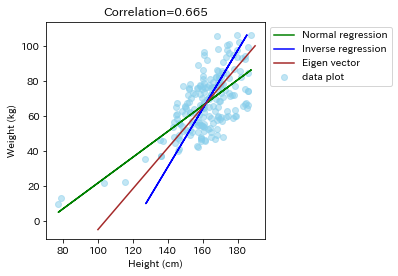

In [11]:
# X based regression
plt.plot(dfHW.height,Y1,color='green',label='Normal regression')
# Y based regression
plt.plot(X2,dfHW.weight,color='blue',label='Inverse regression')
# eigen vector fitting
plt.plot(X3,Y3,color='brown',label='Eigen vector')
# scatter
plt.scatter(dfHW.height,dfHW.weight,label='data plot',color='skyblue',alpha=0.5)
# decoration
plt.title('Correlation='+corrHW)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.axis('scaled') 
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## グラフの解読

このグラフを見ると，改めて近似直線を選択することの難しさがあります．
データの分布には幾つもの要因があり，必ずしも1つの直線的な関係に収めてしまうことは単純化し過ぎのようです．
身長と体重の関係についての考察を検討します．

- 身長と体重の間には正の相関が認められる．
- 乳幼児から成人にかけての身長および体重については，年齢が隠れた要因になっている．
- 成人以降は，年齢の影響が無くなる．

このようなことを考慮するならば，成長期と成人のデータを分けて分布を確認することが，興味ある探索的データ分析と言えます．

## 偏相関係数

身長と体重の相関には，年齢の影響があると考えられます．
そこで身長と体重の相関係数から年齢の影響を取り除いた相関係数を求めてみます．
このような第3の変量の影響を除いた相関係数を偏相関係数と言います．

変量 $x$, $y$, $z$ について，$z$ の影響を除いた $x$ と $y$ の偏相関係数を $r_{xy-z}$ とすると，

> $$ r_{xy-z} = \frac{r_{xy}-r_{xz}r_{yz}}{\sqrt{1-{r_{xz}}^2}\sqrt{1-{r_{yz}}^2}} $$

データフレームの corr()関数によって，数値データの相関係数を一度に求めます．

```Python
corrXYZ = df.corr()
corrXYZ
```

In [12]:
corrXYZ = df.corr()
corrXYZ

,height,weight,age
height,1.000000,0.665228,0.233123
weight,0.665228,1.000000,0.204400
age,0.233123,0.204400,1.000000


このデータでは，成長期の人が少ないため，年齢と身長・体重との相関係数が小さな値になっています．
ただし，成長期の人に限れば高い相関係数になります．

さて，これらの相関係数を用いて，身長と体重から年齢の影響を除いた偏相関係数を求めます．

```Python
rXY = corrXYZ.height.weight
rXZ = corrXYZ.height.age
rYZ = corrXYZ.weight.age
(rXY-rXZ*rYZ)/np.sqrt(1-rXZ**2)/np.sqrt(1-rYZ**2)
```

In [13]:
rXY = corrXYZ.height.weight
rXZ = corrXYZ.height.age
rYZ = corrXYZ.weight.age
(rXY-rXZ*rYZ)/np.sqrt(1-rXZ**2)/np.sqrt(1-rYZ**2)

0.6487728006300634

年齢の影響を除くと，相関が若干ですが弱くなっていることが分かります．

*****